In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r'C:\Users\shabb\OneDrive\Documents\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [9]:
pd.options.display.max_columns = None

In [10]:
data['Class'].value_counts() # imbalance data

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
# 0= nrml transection .... 1= fraudtransection
NRML= data[data['Class']==0]
fraud= data[data['Class']==1]

In [13]:
print(NRML.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# under sampling 

In [14]:
under_sample=NRML.sample(n=492)

In [15]:
print(under_sample.shape)
print(fraud.shape)

(492, 31)
(492, 31)


In [17]:
new_data=pd.concat([under_sample,fraud], axis=0)

In [19]:
new_data.shape

(984, 31)

In [20]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [22]:
new_data.reset_index(inplace=True)

In [23]:
new_data.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,230743,146457.0,-0.396789,1.322367,-0.970207,-1.669357,2.040861,-0.687063,2.217365,-0.935931,0.323517,1.226604,0.322246,0.344941,0.410042,-0.110095,-0.689941,-0.553505,-1.365873,0.164040,0.409495,0.597199,-0.007317,0.929903,-0.481766,-1.095835,-0.109891,0.067495,0.219501,-0.222308,7.70,0
1,51903,45180.0,0.077813,-2.230028,1.410184,2.136913,-2.223116,0.764759,-0.665079,0.332257,2.112260,-0.649814,-1.752418,0.003105,-1.557260,-0.806940,-1.190552,-0.291111,0.355241,0.347669,-0.067393,0.798365,0.380309,0.388356,-0.599764,0.428705,0.348037,-0.164354,0.016652,0.128417,527.17,0
2,99363,67082.0,1.303843,-0.628856,0.540324,0.034736,-1.020818,-0.045060,-0.731557,0.106405,-0.526692,0.782313,0.254436,0.322623,-0.623757,-0.015789,-1.116379,-1.510225,0.013589,1.480101,-0.156643,-0.551255,-0.447485,-0.660437,-0.034125,-0.005905,0.423417,0.418134,0.001809,0.002420,11.50,0
3,277182,167508.0,-0.732313,0.389298,0.615227,-1.073053,1.471257,-0.994080,0.894177,-0.154998,-0.294037,-0.912441,-1.664227,-0.100358,0.173518,0.099806,-0.617314,0.269884,-0.830329,-0.529131,-0.192850,-0.028629,-0.232142,-0.803899,-0.134897,-0.717706,-0.014388,0.152194,0.014626,0.120775,1.78,0
4,165936,117757.0,-1.080568,2.192103,0.521129,2.345516,1.494574,0.266076,1.629063,-0.919627,-0.303111,3.078470,-0.856682,-0.223191,0.839562,-1.159945,-1.205158,0.409287,-1.326396,-0.951819,-1.592846,0.329003,-0.321570,-0.642923,0.073045,0.651909,-0.425930,-0.616814,-1.159260,-0.419064,2.99,0


In [24]:
new_data.drop(['index','Time'], axis=1, inplace=True)

In [25]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.396789,1.322367,-0.970207,-1.669357,2.040861,-0.687063,2.217365,-0.935931,0.323517,1.226604,0.322246,0.344941,0.410042,-0.110095,-0.689941,-0.553505,-1.365873,0.164040,0.409495,0.597199,-0.007317,0.929903,-0.481766,-1.095835,-0.109891,0.067495,0.219501,-0.222308,7.70,0
1,0.077813,-2.230028,1.410184,2.136913,-2.223116,0.764759,-0.665079,0.332257,2.112260,-0.649814,-1.752418,0.003105,-1.557260,-0.806940,-1.190552,-0.291111,0.355241,0.347669,-0.067393,0.798365,0.380309,0.388356,-0.599764,0.428705,0.348037,-0.164354,0.016652,0.128417,527.17,0
2,1.303843,-0.628856,0.540324,0.034736,-1.020818,-0.045060,-0.731557,0.106405,-0.526692,0.782313,0.254436,0.322623,-0.623757,-0.015789,-1.116379,-1.510225,0.013589,1.480101,-0.156643,-0.551255,-0.447485,-0.660437,-0.034125,-0.005905,0.423417,0.418134,0.001809,0.002420,11.50,0
3,-0.732313,0.389298,0.615227,-1.073053,1.471257,-0.994080,0.894177,-0.154998,-0.294037,-0.912441,-1.664227,-0.100358,0.173518,0.099806,-0.617314,0.269884,-0.830329,-0.529131,-0.192850,-0.028629,-0.232142,-0.803899,-0.134897,-0.717706,-0.014388,0.152194,0.014626,0.120775,1.78,0
4,-1.080568,2.192103,0.521129,2.345516,1.494574,0.266076,1.629063,-0.919627,-0.303111,3.078470,-0.856682,-0.223191,0.839562,-1.159945,-1.205158,0.409287,-1.326396,-0.951819,-1.592846,0.329003,-0.321570,-0.642923,0.073045,0.651909,-0.425930,-0.616814,-1.159260,-0.419064,2.99,0


In [28]:
x=new_data.drop('Class', axis=1)
y=new_data['Class']

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=100)
model.fit(x_train,y_train)

C:\Users\shabb\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

# TRAINING ACCURACY

In [95]:
model.score(x_train,y_train)

0.9607558139534884

# TESTING ACCURACY

In [96]:
model.score(x_test,y_test)

0.9425675675675675

In [97]:
y_pre=model.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [99]:
accuracy_score(y_pre, y_test)

0.9425675675675675

In [100]:
confusion_matrix(y_pre, y_test)

array([[146,  13],
       [  4, 133]], dtype=int64)

<Axes: >

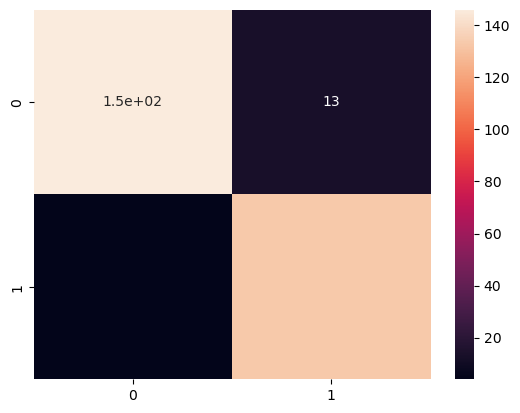

In [101]:
sns.heatmap(confusion_matrix(y_pre, y_test), annot=True)

In [106]:
print(classification_report(y_pre, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       159
           1       0.91      0.97      0.94       137

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

